In [32]:
import json
import os
import re
from tqdm.auto import tqdm
import numpy as np
from nltk.corpus import wordnet
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import sys
sys.path.insert(0, "generate_abstractions")
from wordnet_postprocessing import compute_spec

In [2]:
_files = os.listdir("./gen_1")

In [28]:
for _file in _files:
    
    if not "405" in _file:
        continue
    with open("processed_gen_1/" + _file) as f:
        _read_file = [json.loads(i) for i in f.readlines()]
    _read_file = [i for i in _read_file if i["list"] is not None or i["list_spec"] is not None or i["list_spec_corr"] is not None]
    for i in _read_file:
        try:
            _idx = i["list_spec"].index(0)
        except:
            _idx = len(i["list_spec"])
        i["list"] = i["list"][:_idx]
        i["list_spec"] = i["list_spec"][:_idx]
    _read_file = [i for i in _read_file if len([j for j in i["list_spec"] if j > 0]) > 2]
        
    if _file == "generation_output_llama-3.1-405b-instruct-hf_You are a teacher explaining the concept of abstraction and concreteness to a class of 5th grad.jsonl":
        specific_file = _file
        specific_read_file = _read_file
        for idx in range(10):
            print(_read_file[idx]["token"], "\t", _read_file[idx]["list"])
    print(len(_read_file))
    print(np.mean([i["list_spec_corr"] for i in _read_file if i["list_spec_corr"] is not None and not np.isnan(i["list_spec_corr"])]))


entirety 	 ['existence', 'reality', 'wholeness', 'completeness', 'entirety']
creationism 	 ['concept', 'idea', 'belief', 'theory', 'doctrine', 'creationism']
thousand 	 ['concept', 'quantity', 'number']
flashback 	 ['concept', 'memory', 'recollection', 'reminiscence', 'flashback']
originality 	 ['concept', 'idea', 'notion', 'creativity', 'originality', 'innovation']
mozzarella 	 ['object', 'food', 'dairy', 'cheese', 'mozzarella']
maypole 	 ['object', 'structure', 'monument', 'landmark', 'tradition', 'maypole']
dizziness 	 ['feeling', 'sensation', 'discomfort', 'dizziness', 'lightheadedness', 'vertigo']
electrostatics 	 ['science', 'physics', 'electricity', 'electrostatics']
subversion 	 ['concept', 'idea', 'notion', 'theory', 'principle', 'action', 'movement', 'protest', 'subversion']
8413
0.5030279542422674
9044
0.47355314653057845
10665
0.464962231608569
11632
0.5837916024891524
9223
0.4766644544313452
9178
0.4739921764788866
9168
0.5121104930930951
63
0.5574067605885511
8885
0.47599

8401 0.5030279542422674


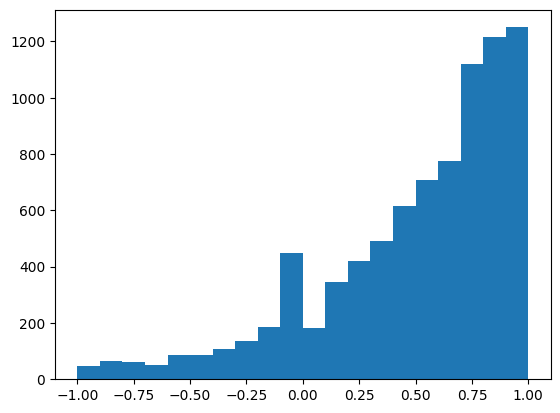

In [29]:
clean_list = [i["list_spec_corr"] for i in specific_read_file if len(i["list"]) > 1 and not np.isnan(i["list_spec_corr"])]
print(len(clean_list), np.mean(clean_list))
plt.hist([i["list_spec_corr"] for i in specific_read_file if len(i["list"]) > 1 and i["list_spec_corr"] is not None and not np.isnan(i["list_spec_corr"])], bins=20);

In [30]:
idx = 51

_mylist = [i for i in specific_read_file if i["list_spec_corr"] is not None and i["list_spec_corr"] < 0 and len(i["list"]) > 1]
print(_mylist[idx]["token"])
print(_mylist[idx]["list"])
print(_mylist[idx]["list_spec"])

vow
['concept', 'promise', 'oath', 'vow']
[1.5, 2.25, 1.5, 1.5]


In [35]:
compute_spec("concept")

1.5